Import packages

In [8]:
from dataretrieval import nwis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

Identify USGS site IDs and dates

In [2]:
siteNumber = ["12305000","06038800", "13340600", "13092747","13311000", "14197900"
             ] 
parameterCode = "00060" # Discharge
startDate = "1990-10-01"
endDate = "2024-09-30"
idv=[ "00060_Mean"  ]

Retrive site infomation

In [3]:
site_info = nwis.get_info(sites= siteNumber )

site_info_df = pd.DataFrame( site_info[0] )

print( site_info_df )

#print( site_info_df.columns )

site_info_df["site_no"]=site_info_df["site_no"].astype(str)

columns_to_save = ['site_no', 'dec_lat_va', 'dec_long_va']

filtered_df = site_info_df[columns_to_save]

print(filtered_df)

filtered_df.to_csv('site_info_df.csv', index=False)

  agency_cd   site_no                                       station_nm  \
0      USGS  06038800       Madison River at Kirby Ranch nr Cameron MT   
1      USGS  12305000                     KOOTENAI RIVER AT LEONIA, ID   
2      USGS  13092747    ROCK CREEK AB HWY 30/93 XING AT TWIN FALLS ID   
3      USGS  13311000            EF OF SF SALMON RIVER AT STIBNITE, ID   
4      USGS  13340600  NF CLEARWATER RIVER NR CANYON RANGER STATION ID   
5      USGS  14197900                  WILLAMETTE RIVER AT NEWBERG, OR   

  site_tp_cd     lat_va     long_va  dec_lat_va  dec_long_va coord_meth_cd  \
0         ST  445319.16  1113451.19   44.888656  -111.580886             N   
1         ST  483700.78  1160257.10   48.616883  -116.049194             N   
2         ST  423345.00  1142941.00   42.562500  -114.494722             M   
3         ST  445420.60  1151946.20   44.905722  -115.329500             N   
4         ST  465026.00  1153716.00   46.840556  -115.621111             G   
5         ST 

Extract stream temp data

In [4]:
parameterCode = ["00010" ,"00060"]

dailyStreamtemp = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year

# Remove rows containing NaN values
dailyStream_df = dailyStreamtemp_df.dropna()

print( dailyStream_df)

        site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
561    06038800 1995-04-12 00:00:00+00:00            5.5                A   
562    06038800 1995-04-13 00:00:00+00:00            6.5                A   
563    06038800 1995-04-14 00:00:00+00:00            6.0                A   
564    06038800 1995-04-15 00:00:00+00:00            6.5                A   
565    06038800 1995-04-16 00:00:00+00:00            6.5                A   
...         ...                       ...            ...              ...   
63918  14197900 2024-09-26 00:00:00+00:00           17.3                P   
63919  14197900 2024-09-27 00:00:00+00:00           16.8                P   
63920  14197900 2024-09-28 00:00:00+00:00           16.8                P   
63921  14197900 2024-09-29 00:00:00+00:00           16.6                P   
63922  14197900 2024-09-30 00:00:00+00:00           16.5                P   

       00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd  00060_Mean

In [5]:
def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

12305000
       00060_Mean
561        1640.0
562        1640.0
563        1650.0
564        1630.0
565        1620.0
...           ...
63918      9290.0
63919      9210.0
63920      9120.0
63921      8690.0
63922      8200.0

[37205 rows x 1 columns]


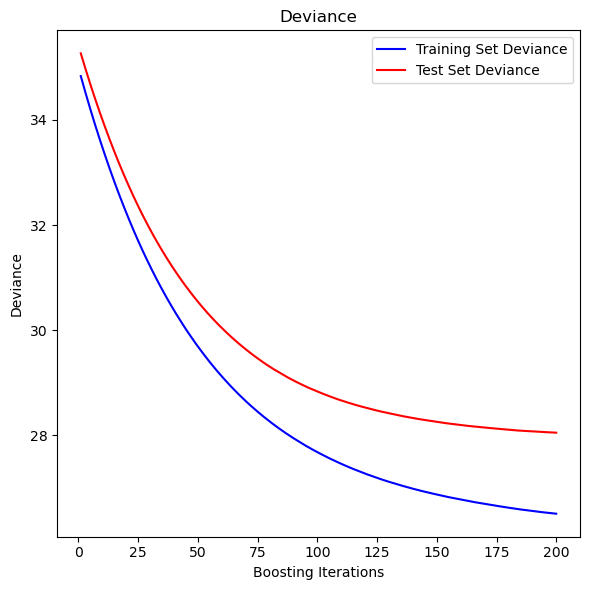

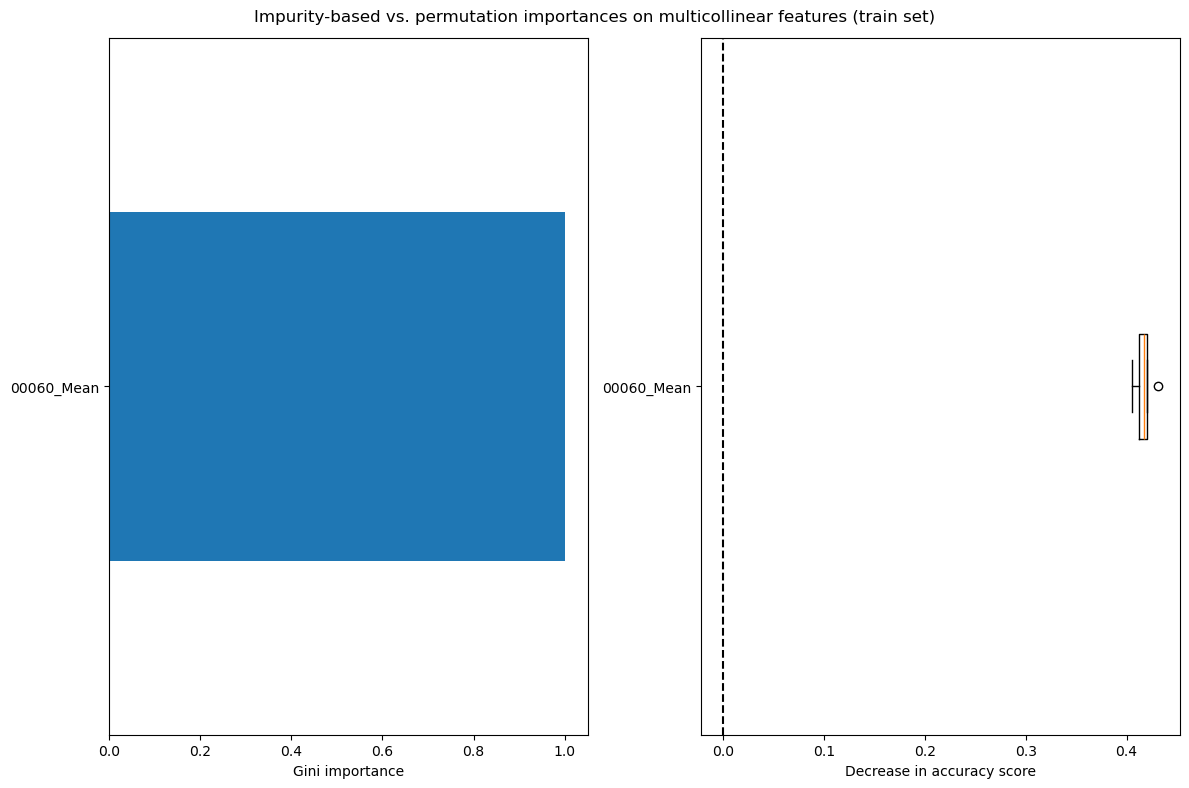

correlation_coefficient: 0.4585170684887417
MSE: 4.416374738459834
RMS: 5.296456348287802


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


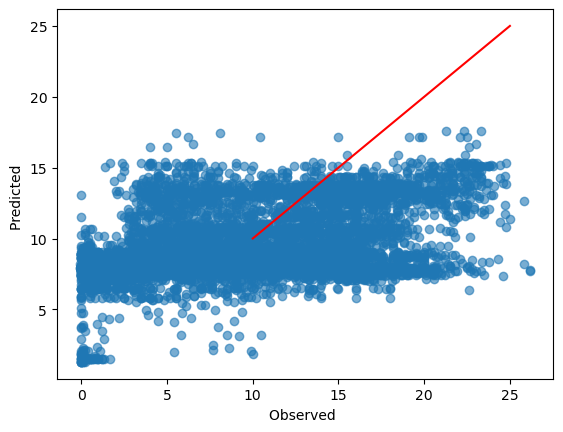

06038800
       00060_Mean
561        1640.0
562        1640.0
563        1650.0
564        1630.0
565        1620.0
...           ...
63918      9290.0
63919      9210.0
63920      9120.0
63921      8690.0
63922      8200.0

[37205 rows x 1 columns]


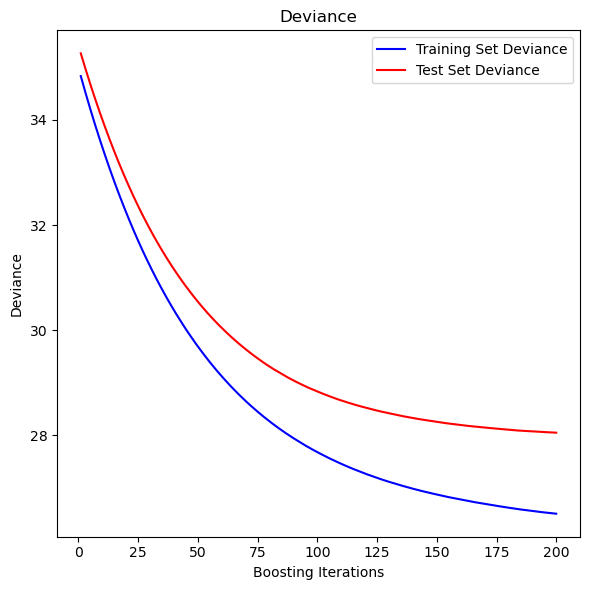

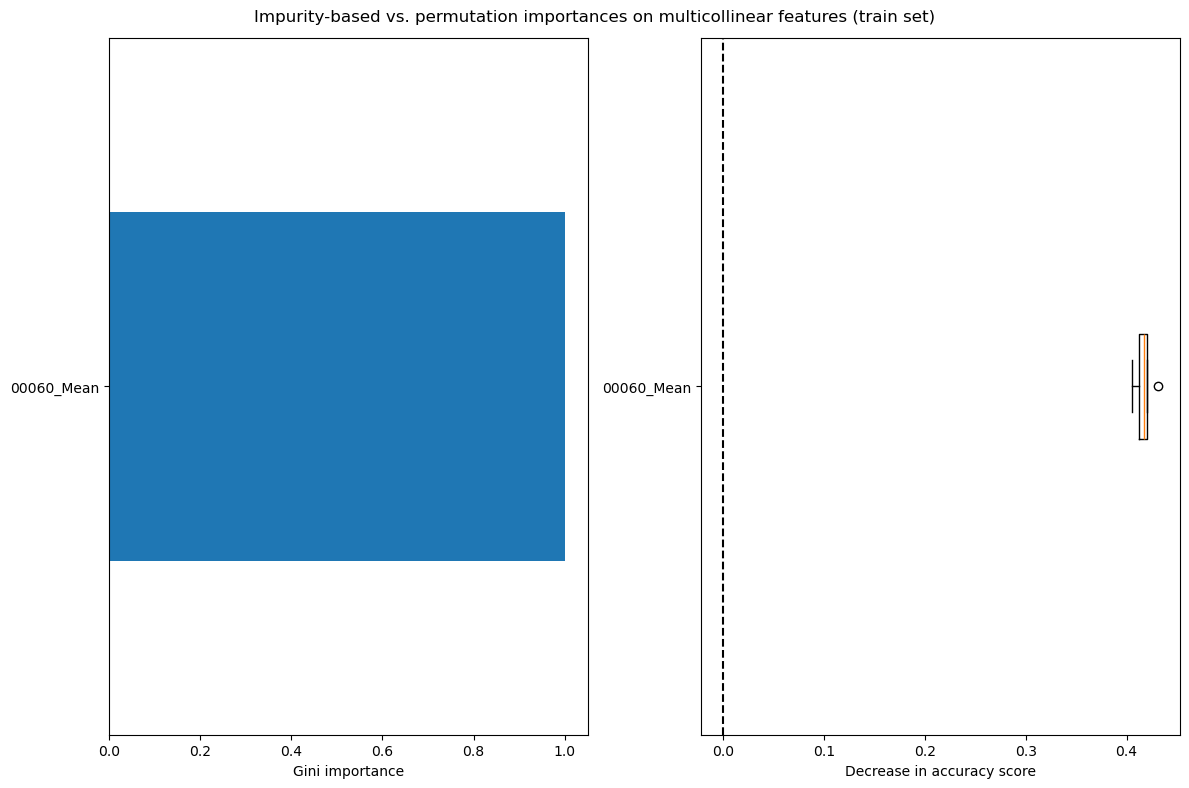

correlation_coefficient: 0.4585170684887417
MSE: 4.416374738459834
RMS: 5.296456348287802


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


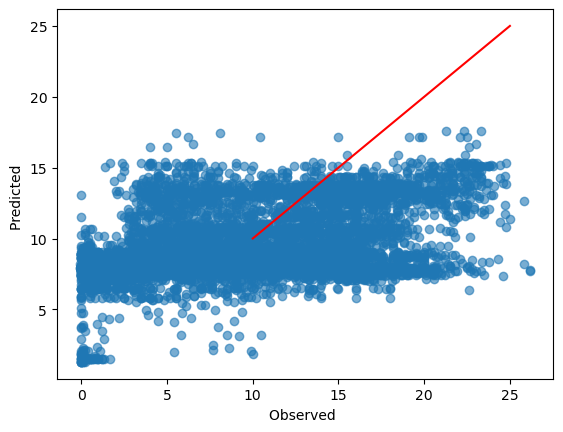

13340600
       00060_Mean
561        1640.0
562        1640.0
563        1650.0
564        1630.0
565        1620.0
...           ...
63918      9290.0
63919      9210.0
63920      9120.0
63921      8690.0
63922      8200.0

[37205 rows x 1 columns]


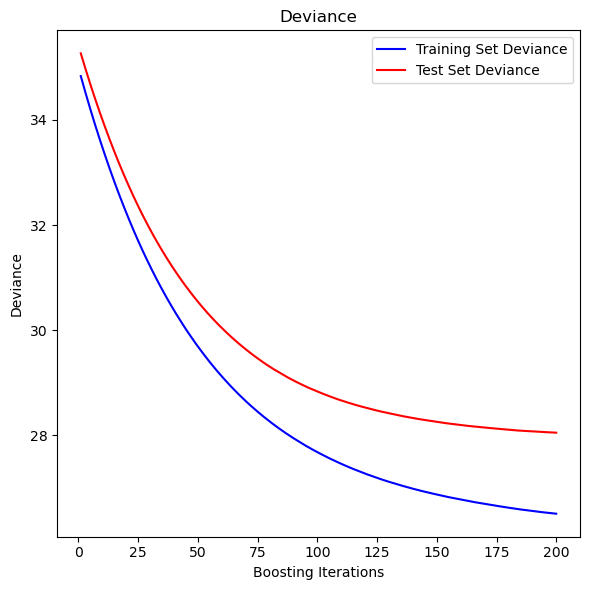

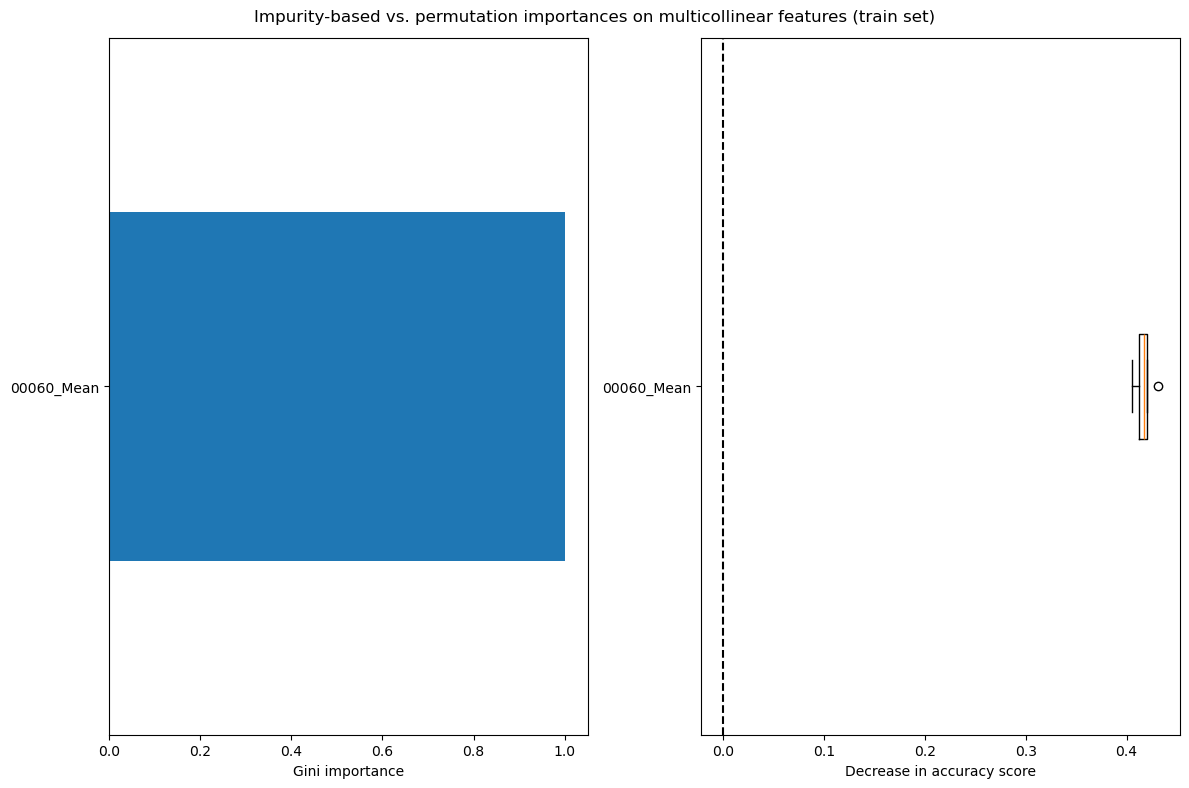

correlation_coefficient: 0.4585170684887417
MSE: 4.416374738459834
RMS: 5.296456348287802


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


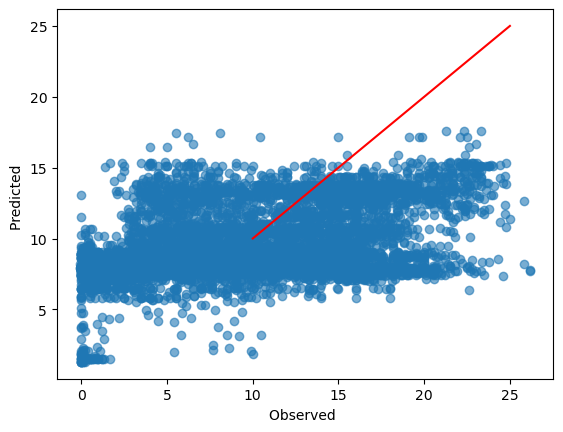

13092747
       00060_Mean
561        1640.0
562        1640.0
563        1650.0
564        1630.0
565        1620.0
...           ...
63918      9290.0
63919      9210.0
63920      9120.0
63921      8690.0
63922      8200.0

[37205 rows x 1 columns]


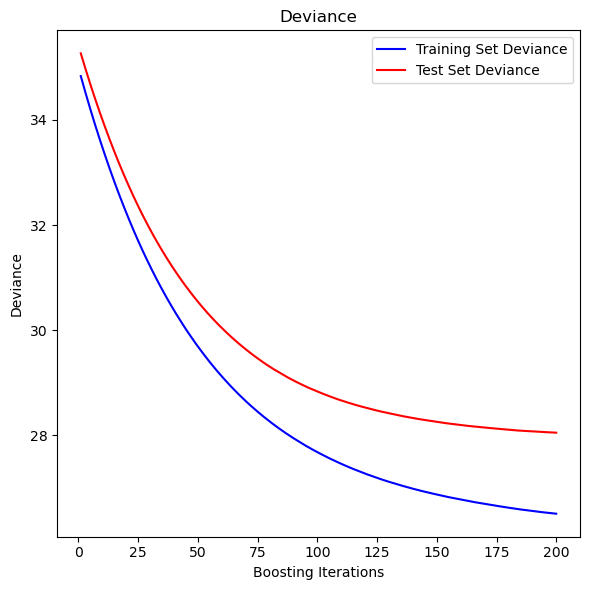

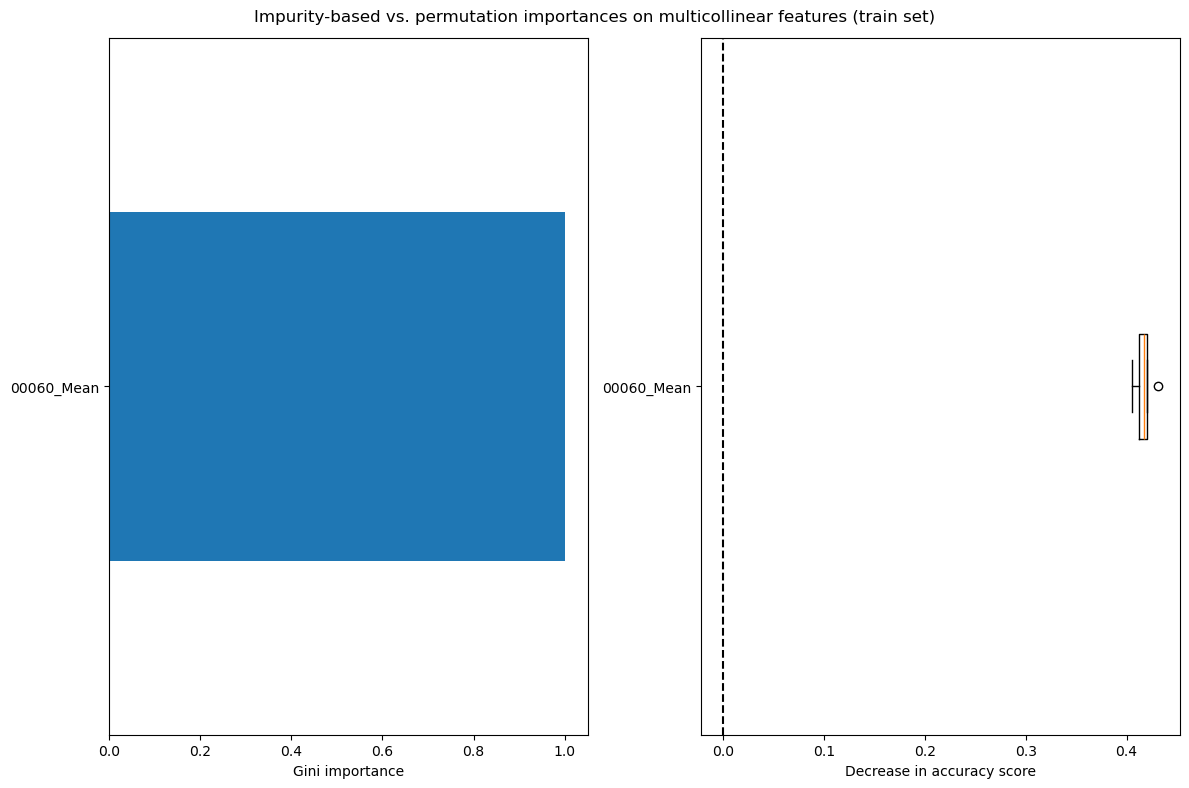

correlation_coefficient: 0.4585170684887417
MSE: 4.416374738459834
RMS: 5.296456348287802


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


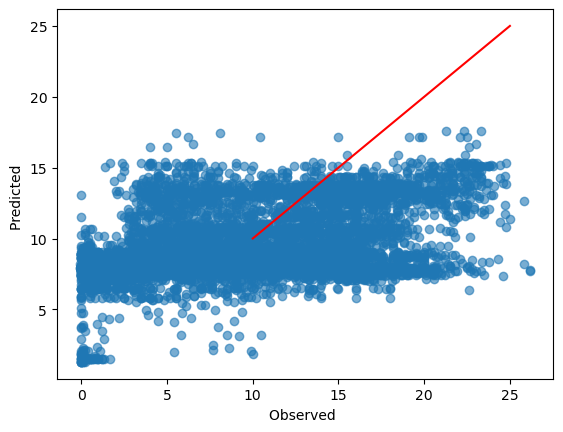

13311000
       00060_Mean
561        1640.0
562        1640.0
563        1650.0
564        1630.0
565        1620.0
...           ...
63918      9290.0
63919      9210.0
63920      9120.0
63921      8690.0
63922      8200.0

[37205 rows x 1 columns]


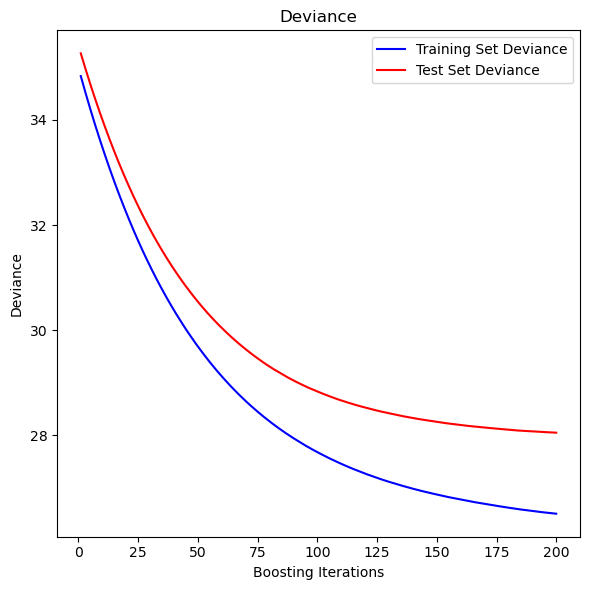

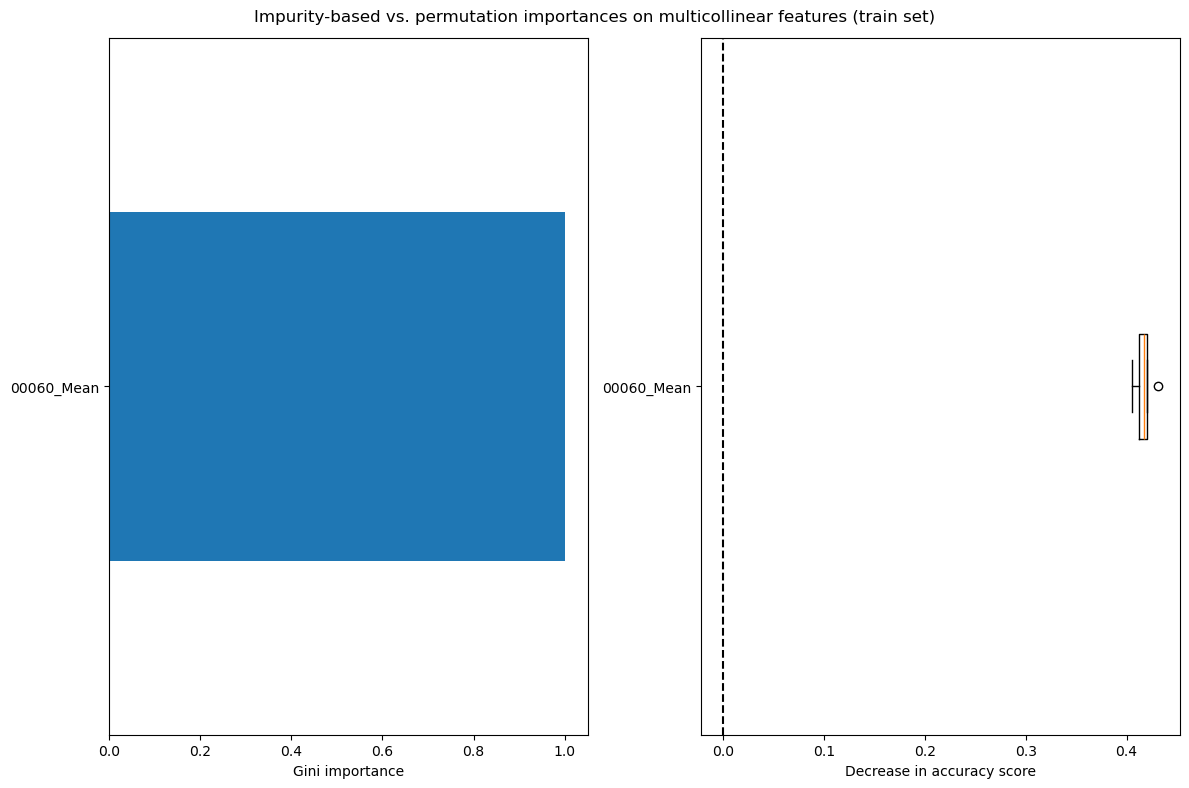

correlation_coefficient: 0.4585170684887417
MSE: 4.416374738459834
RMS: 5.296456348287802


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


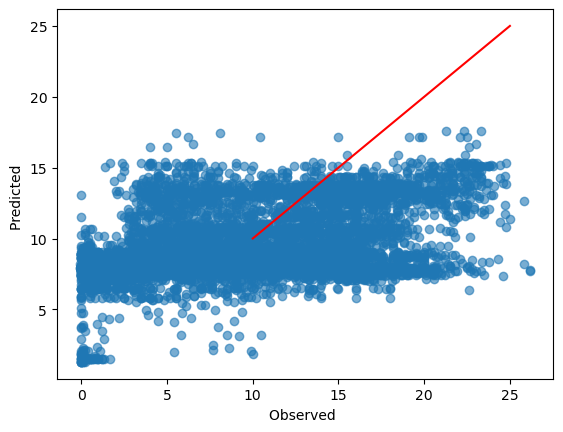

14197900
       00060_Mean
561        1640.0
562        1640.0
563        1650.0
564        1630.0
565        1620.0
...           ...
63918      9290.0
63919      9210.0
63920      9120.0
63921      8690.0
63922      8200.0

[37205 rows x 1 columns]


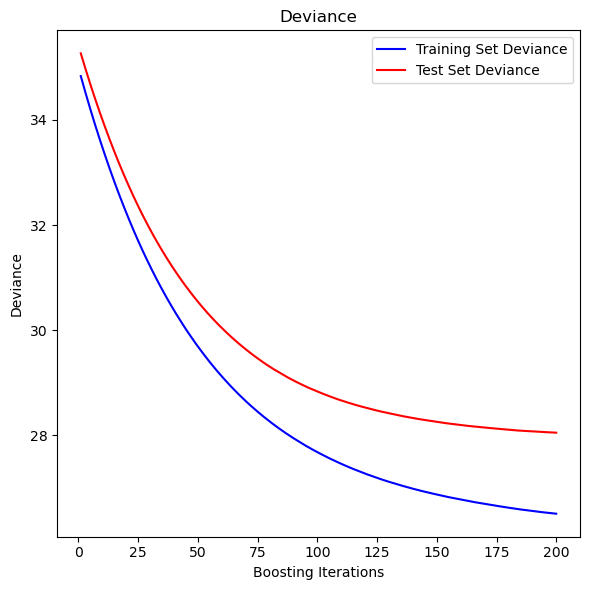

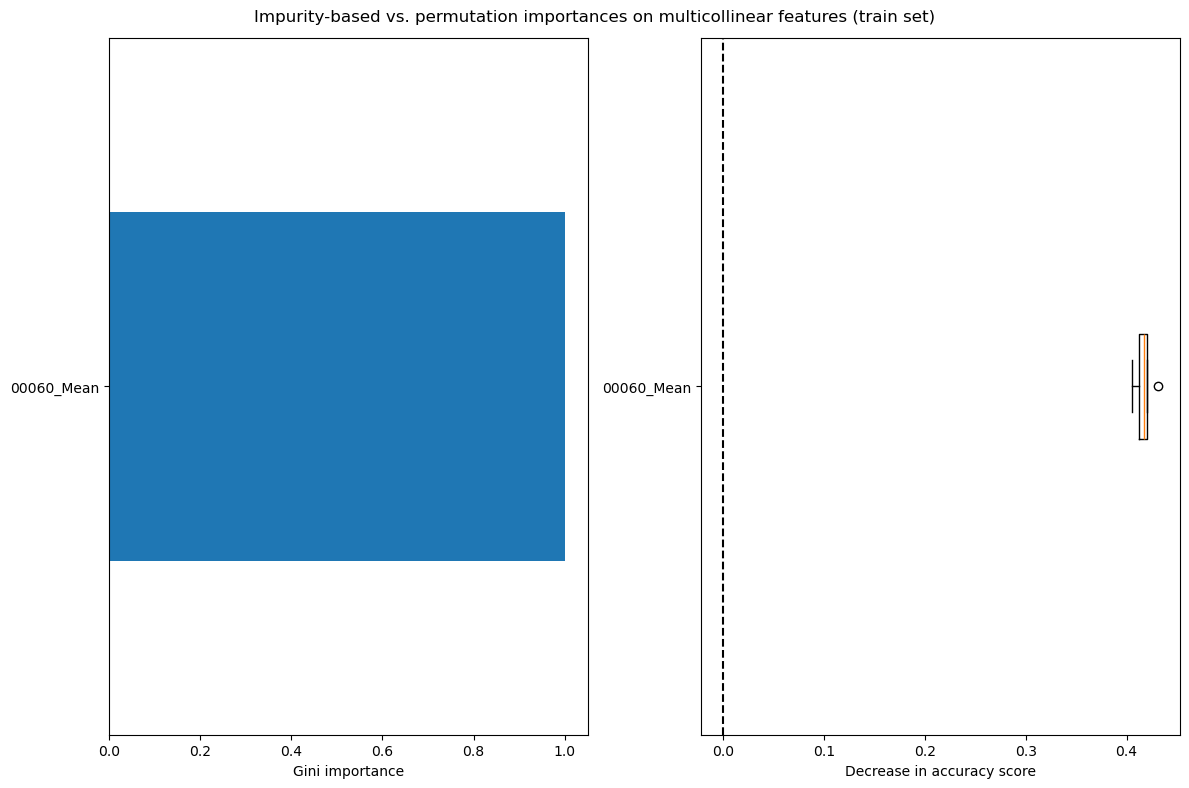

correlation_coefficient: 0.4585170684887417
MSE: 4.416374738459834
RMS: 5.296456348287802


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


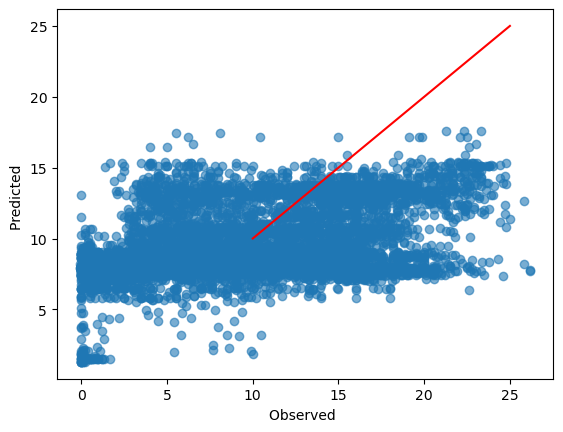

In [9]:
params = {
    "n_estimators":  200,
    "max_depth": 8,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

for site in siteNumber: # prism_df["site_no"].unique(): #
    print(site)
    input=  dailyStream_df[  idv]
    print(input)
    X_train, X_test, y_train, y_test = train_test_split( input,  dailyStream_df['00010_Mean'], test_size=0.2, random_state=42)
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)

    mse = mean_squared_error(y_test, reg.predict(X_test))

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_pred in enumerate(reg.staged_predict(X_test)):
        test_score[i] = mean_squared_error(y_test, y_pred)

    fig = plt.figure(figsize=(6, 6))
    plt.subplot(1, 1, 1)
    plt.title("Deviance")
    plt.plot(
        np.arange(params["n_estimators"]) + 1,
        reg.train_score_,
        "b-",
        label="Training Set Deviance",
    )
    plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
    )
    plt.legend(loc="upper right")
    plt.xlabel("Boosting Iterations")
    plt.ylabel("Deviance")
    fig.tight_layout()
    plt.show()

    mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
    tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
    tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    mdi_importances.sort_values().plot.barh(ax=ax1)
    ax1.set_xlabel("Gini importance")
    plot_permutation_importance(reg, X_train, y_train, ax2)
    ax2.set_xlabel("Decrease in accuracy score")
    fig.suptitle(
        "Impurity-based vs. permutation importances on multicollinear features (train set)"
    )
    _ = fig.tight_layout()

    plt.show()


    
    train_fit=reg.predict(X_train)
    yfit = reg.predict(X_test)

    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
    print("correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)



# Plot the estimated linear regression line with matplotlib:
    plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
    plt.xlabel("Observed ")
    plt.ylabel("Predicted ")

    x = np.linspace(10, 25, 25)
    y = x
    plt.plot(x, y, color='red')

    plt.show()
